# Lab 01 - Linear Algebra

In the following exercises, you are allowed to use the libraries math and matplotlib.

Let say that 2D vectors are represented as tuples.

The basis vector of our 2D space are then:

In [1]:
i = (1, 0)
j = (0, 1)

Matrices are represented as tuples of tuples.

The identity matrix is therefore:

In [19]:
I = ((1, 0), (0, 1))

I[0][0]

1

Important: without any additional instruction on my side, you could have decided to index matrices as row-first or column-first indexing. It is more standard in mathematics and also in python/numpy (for later) to do row-first indexing.

So A[2, 5] would correspond to row 2 (3rd row, as indexing start at 0), and column 5.

In [12]:
import matplotlib.pyplot as plt

# Exercise 1 : vectors

1. Write a function that returns the length of a vector.

2. Write a function that returns the dot product between two vectors.

3. Write a function to plot a list of vectors using matplotlib.

In [9]:
def vector_length(a):
    
    return (a[0]**2 + a[1]**2)**(1/2)

# Here I use assert to check that my calculations are correct on well known examples
assert vector_length( (3,4) ) == 5
assert vector_length( (1,0) ) == 1

In [11]:
def dot(a,b):
    
    return a[0]*b[0] + a[1]*b[1]

assert dot( (1,0), (2,0)) == 2
assert dot( (1,0), (0,1)) == 0

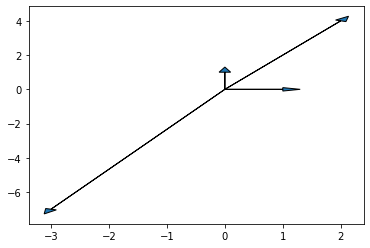

In [17]:
def plot_vectors( list_vectors ):
    
    for vector in list_vectors:
        plt.arrow(0, 0, vector[0], vector[1], head_width=0.2)
        
    plt.show()
    
vectors = [ (0,1), (1,0), (2,4), (-3, -7)]
plot_vectors( vectors )

# Exercise 2 : matrices

1. Write a function that calculates the determinant of a matrix.

2. Write a function that calculates the product between a matrix and a vector (do you need one or two functions?).

3. Write a function that calculates the inverse of a matrix (if it exists).

In [21]:
def determinant(a):
    
    return a[0][0] * a[1][1] - a[0][1] * a[1][0]

assert determinant(I) == 1

In [24]:
def matrix_vector_product(matrix, vector):
    
    # let's reuse the dot product
    return (dot(matrix[0], vector), dot(matrix[1], vector) )
    
mat_a = ( (1,2), (3,4))
vec_b = (5,6)
matrix_vector_product(mat_a, vec_b)

(17, 39)

In [30]:
def matmul(a,b):
    
    b_0 = (b[0][0], b[1][0])
    b_1 = (b[0][1], b[1][1])
    
    return (matrix_vector_product(a, b_0),
            matrix_vector_product(a, b_1))

def inverse(a):
    
    det = determinant(a)
    if det == 0:
        return False
    
    inv = ( ( a[1][1]/det, -a[0][1]/det ),
            ( -a[1][0]/det, a[0][0]/det ) )
    
    return inv

mat_a = ((2,4), (5,9))
matmul( mat_a, inverse(mat_a) )


((1.0, 0.0), (0.0, 1.0))

# Exercise 3 : transformations

Matrices can be viewed as transformations applied to vectors.
In the following exercise, we will represent vectors as their endpoint when starting form the origin of a coordinate system.

1. Write a function to plot 2 lists of vectors, with 2 different colors.

2. Visualize the effects of a transformation by a matrix of deternminant 0. 

2. Visualize classical 2D transformations: rotation, scaling, sheer, ...



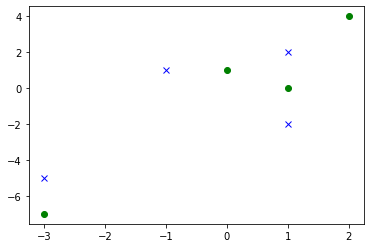

In [32]:
def plot_list_vectors(list_a, list_b):
    
    for vector in list_a:
        plt.plot(vector[0], vector[1], 'go' )
    
    for vector in list_b:
        plt.plot(vector[0], vector[1], 'bx' )
        
    plt.show()
    

vecs_a = [ (0,1), (1,0), (2,4), (-3, -7)]
vecs_b = [ (-1,1), (1,2), (1,-2), (-3, -5)]
plot_list_vectors( vecs_a, vecs_b )

In [36]:
# Let's build a list of evenly spaced vectors:
list_vecs = []
for i in range(-5, 6):
    for j in range(-3, 4):
        list_vecs.append( (i,j) )
        
# Let's take a matrix with determinant 0:
A = ( (2,0), (1,0) )
determinant(A)

0

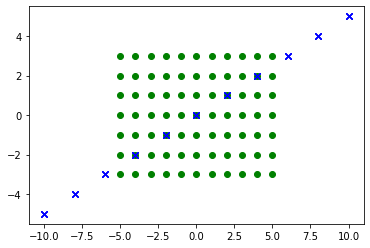

In [37]:
# Now we project all the vectors using A:
list_proj = []
for vec in list_vecs:
    list_proj.append( matrix_vector_product(A, vec) )
    
plot_list_vectors(list_vecs, list_proj)

Amazing! All vectors have been projected on a line that actually follows the vector (2,1)

Now, Let's try with another matrix, and you can try on your own the other classical transformations..


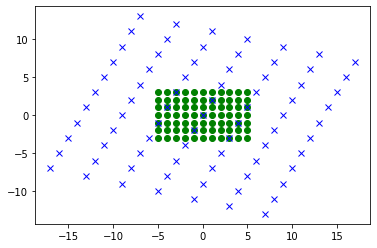

In [39]:
B = ( (1, 4), (2, -1) )
list_proj = []
for vec in list_vecs:
    list_proj.append( matrix_vector_product(B, vec) )
    
plot_list_vectors(list_vecs, list_proj)
